<a href="https://colab.research.google.com/github/ilhamsyah183/rock-paper-scissors/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
  !wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-07-20 17:07:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.56MB/s    in 45s     

2020-07-20 17:07:49 (6.88 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [7]:

import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/suit')
zip_ref.close()


In [8]:
!pip install split_folders

In [9]:
import split_folders

split_folders.ratio('/content/suit/rockpaperscissors/rps-cv-images', 
                    output="/content/suit/rockpaperscissors", seed=1337, ratio=(.6, .4))


Copying files: 2188 files [00:00, 2214.41 files/s]


In [10]:
import zipfile,os
os.listdir('/content/suit/rockpaperscissors/train')

['scissors', 'paper', 'rock']

In [11]:
base_path = "/content/suit/rockpaperscissors"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')

In [12]:
# membuat path kertas training
train_paper_path = os.path.join(train_path, 'paper')
  
# membuat path batu training
train_rock_path = os.path.join(train_path, 'rock')

# membuat path gunting training
train_scissors_path = os.path.join(train_path, 'scissors')
  
# membuat path kertas validasi
validation_paper_path = os.path.join(validation_path, 'paper')

# membuat path batu validasi
validation_rock_path = os.path.join(validation_path, 'rock')

# membuat path kertas validasi
validation_scissors_path = os.path.join(validation_path, 'scissors')


In [13]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
  
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [14]:
train_generator = train_datagen.flow_from_directory(
                        train_path,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        # shuffle=True,
                    )

validation_generator = test_datagen.flow_from_directory(
                        validation_path,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        # shuffle=False,
                    )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 14,978,883
Trainable params: 264,195
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# history = model.fit_generator(
#     train_generator,  
#     validation_data  = validation_generator,
#     epochs = 5, 
#     verbose = 1
# )

model.fit(
      train_generator,
      steps_per_epoch=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/10
15/15 [==============================] - 310s 21s/step - loss: 1.0571 - accuracy: 0.4708 - val_loss: 0.7754 - val_accuracy: 0.9125
Epoch 2/10
15/15 [==============================] - 313s 21s/step - loss: 0.7297 - accuracy: 0.7688 - val_loss: 0.5229 - val_accuracy: 0.9625
Epoch 3/10
15/15 [==============================] - 308s 21s/step - loss: 0.4791 - accuracy: 0.9104 - val_loss: 0.3881 - val_accuracy: 0.9375
Epoch 4/10
15/15 [==============================] - 312s 21s/step - loss: 0.3518 - accuracy: 0.9438 - val_loss: 0.2740 - val_accuracy: 0.9500
Epoch 5/10
15/15 [==============================] - 310s 21s/step - loss: 0.2798 - accuracy: 0.9500 - val_loss: 0.2295 - val_accuracy: 0.9438
Epoch 6/10
15/15 [==============================] - 313s 21s/step - loss: 0.2254 - accuracy: 0.9542 - val_loss: 0.2025 - val_accuracy: 0.9625
Epoch 7/10
15/15 [==============================] - 309s 21s/step - loss: 0.1659 - accuracy: 0.9708 - val_loss: 0.1352 - val_accuracy: 0.9812
Epoch 

Saving 20200720_131329 - Copy.jpg to 20200720_131329 - Copy.jpg
[[6.2789050e-09 1.0000000e+00 1.7659933e-24]]
20200720_131329 - Copy.jpg
rock


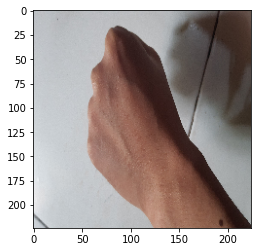

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
  
uploaded = files.upload()
  
for fn in uploaded.keys():
  

  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)
  print(classes)
  print(fn)
  if result == 0:
    print('paper')
  elif result == 1:
    print('rock')
  else:
    print('scissors')